In [ ]:
import pandas
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pandas.read_csv("TempData.csv")

# Map categorical data in the 'Nationality' column to numerical values
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

# Map categorical data in the 'Go' column to numerical values
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

# Define the features (input variables) and target variable
features = ['Age', 'Experience', 'Rank', 'Nationality']  # Columns to be used as features
X = df[features]  # Input features
y = df['Go']  # Target variable

# Initialize the decision tree classifier
dtree = DecisionTreeClassifier()

# Fit the decision tree classifier on the data
dtree = dtree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the size of the plot
plot_tree(
    dtree, 
    feature_names=features,  # Display feature names
    class_names=['No', 'Yes'],  # Display class names for target variable
    filled=True,  # Fill nodes with colors representing the classes
    rounded=True,  # Use rounded corners for the boxes
    fontsize=10  # Set font size
)
plt.show()  # Show the plot

# Print a textual representation of the decision tree
print(export_text(dtree, feature_names=features))




In [ ]:
# Load the dataset
df = pandas.read_csv("poker-hand-training-true.csv")

# Define the features and target
features = ["S1", "R1", "S2", "R2", "S3", "R3", "S4", "R4", "S5", "R5"]
X_train = df[features]  # Features from training data
y_train = df["Class"]  # Target from training data

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print(f"Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

## Decision Tree Training Results

### Tree Structure
- **Tree Depth**: 30  
  - The depth of the tree is the longest path from the root node to a leaf node.  
  - A depth of 30 indicates that the tree has grown very deep, creating a highly detailed set of rules for classification.  
  - While this might improve training accuracy, it can lead to **overfitting**, where the model memorizes the training data instead of generalizing patterns.

- **Number of Leaves**: 9196  
  - Leaves are the terminal nodes in the tree where predictions are made.  
  - The tree has 9196 leaves, which suggests it has created a large number of distinct rules to classify the data.  
  - While this level of complexity is expected for a dataset like Poker Hands (due to the many combinations of suits and ranks), it could also indicate **overfitting**.

  ### Addressing Overfitting
To prevent overfitting and improve the model's generalization ability:
1. **Limit the Depth of the Tree**:
   - Restrict the maximum depth of the tree to control its complexity

2. **Limit the Minimum Samples per Leaf**:
   - Set a minimum number of samples required for a leaf node

3. **Prune the Tree**:
   - Use cost-complexity pruning (`ccp_alpha`) to remove overly specific splits


In [ ]:
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10,  max_depth=10) # Added cap on depth and minimum samples per leaf
model.fit(X_train, y_train)
print(f"Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

In [ ]:
from sklearn.metrics import accuracy_score

# Get the effective alpha values for pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Display alpha values and corresponding tree impurities
print("Effective Alphas:", ccp_alphas)
print("Impurities for each alpha:", impurities)

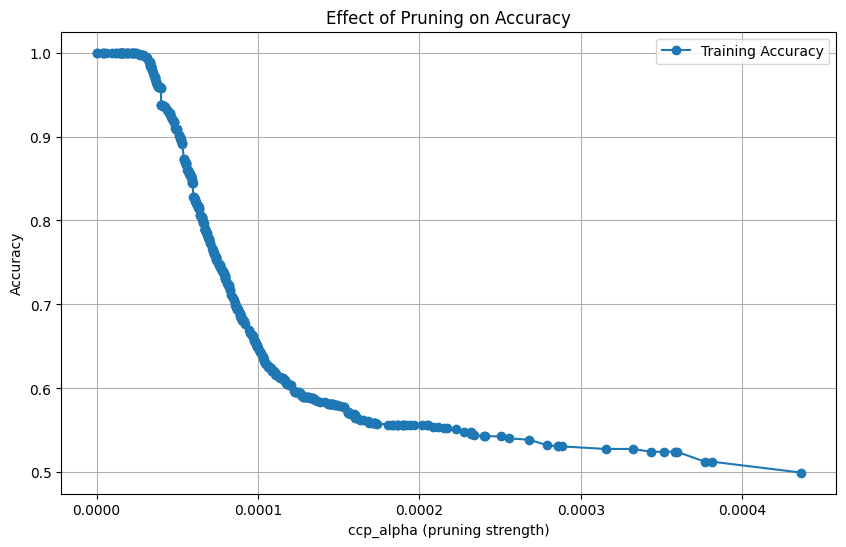

In [11]:
# Train models for each alpha
models = []
train_scores = []

for alpha in ccp_alphas:
    # Train a new tree for each alpha
    pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_model.fit(X_train, y_train)
    models.append(pruned_model)
    
    # Evaluate on training
    train_scores.append(pruned_model.score(X_train, y_train))

# Plot accuracy vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Training Accuracy", marker='o')
plt.xlabel("ccp_alpha (pruning strength)")
plt.ylabel("Accuracy")
plt.title("Effect of Pruning on Accuracy")
plt.legend()
plt.grid()
plt.show()